# **ESEN**

**Credit Card Fraud Detection**

*by Kübra Çağlar*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
LABELS = ["Normal","Fraud"]

In [ ]:
# Extracting dataset from the file
path = '/content/drive/MyDrive/Esen/creditcard.csv'
dataset = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Check for any  nullvalues 
print("Any nulls in the dataset ",dataset.isnull().values.any() )
print("No. of unique labels ", len(dataset['Class'].unique()))
print("Label values ",dataset.Class.unique())
# 0 is for normal credit card transaction
# 1 is for fraudulent credit card transaction
print("Break down of the Normal and Fraud Transactions")
print(pd.value_counts(dataset['Class'], sort = True) )

Any nulls in the dataset  False
No. of unique labels  2
Label values  [0 1]
Break down of the Normal and Fraud Transactions
0    284315
1       492
Name: Class, dtype: int64


In [ ]:
# Save the normal and fradulent transactions in separate dataframe
normal_dataset = dataset[dataset.Class == 0] 
fraud_dataset = dataset[dataset.Class == 1]
# Checking the tabular data to determine which columns to use
fraud_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [ ]:
raw_data = normal_dataset.values
# The last element contains if the transaction is normal which is represented by a 0 and if fraud then 1
labels = raw_data[:, -1]
# The other data points are the electrocadriogram data
data = raw_data[:, 1:-1]

#Seperating train and test data
train_data1, test_data, train_labels1, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=1245)

#Forming test data (by stacking normal and fraud data)
test_data_label = np.hstack([test_data,test_labels.reshape(len(test_labels),1)])
anomaly_data_label = np.vstack([test_data_label,fraud_dataset.values[:,1:]])
np.random.shuffle(anomaly_data_label)
anomaly_data = anomaly_data_label[:,:-1]
anomaly_label = anomaly_data_label[:,-1]

In [ ]:
# Displaying the shapes of train, validation, and test data
print("train1 data shape: ", train_data1.shape)
print("train1 label shape: ", train_labels1.shape)
print("test data shape: ", test_data.shape)
print("test label shape: ", test_labels.shape)
print("anomaly data shape: ", anomaly_data.shape)
print("anomaly label shape: ", anomaly_label.shape)

train1 data shape:  (227452, 29)
train1 label shape:  (227452,)
test data shape:  (56863, 29)
test label shape:  (56863,)
anomaly data shape:  (57355, 29)
anomaly label shape:  (57355,)


In [ ]:
anomaly_label

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# Seperating train and validation data
train_data2, valid_data, train_labels2, valid_labels = train_test_split(
    train_data1, train_labels1, test_size=0.2, random_state=5423)

In [ ]:
# Creating arrays for fit transforms  
train_data2_sc = np.ndarray(train_data2.shape)
print(train_data2_sc.shape)
valid_data_sc = np.ndarray(valid_data.shape)
print(valid_data_sc.shape)
anomaly_data_sc = np.ndarray(anomaly_data.shape)
print(anomaly_data_sc.shape)

(181961, 29)
(45491, 29)
(57355, 29)


In [ ]:
# Displaying the shapes of train, validation, and test data which are to be fit-transformed
print("train data shape: ", train_data2.shape)
print("train label shape: ", train_labels2.shape)
print("valid data shape: ", valid_data.shape)
print("valid label shape: ", valid_labels.shape)
print("anomaly data shape: ", anomaly_data.shape)
print("anomaly label shape: ", anomaly_label.shape)

train data shape:  (181961, 29)
train label shape:  (181961,)
valid data shape:  (45491, 29)
valid label shape:  (45491,)
anomaly data shape:  (57355, 29)
anomaly label shape:  (57355,)


In [ ]:
type(train_data2)

numpy.ndarray

In [ ]:
# Scaling all data with respect to scaled train data
sc = MinMaxScaler((-0.5, 0.5))
for ii in range(train_data2.shape[1]):
  sc.fit(train_data2[:,ii].reshape(-1,1))
  train_data2_sc[:,ii] = np.squeeze(sc.transform(train_data2[:,ii].reshape(-1,1)))
  valid_data_sc[:,ii] = np.squeeze(sc.transform(valid_data[:,ii].reshape(-1,1)))
  anomaly_data_sc[:,ii] = np.squeeze(sc.transform(anomaly_data[:,ii].reshape(-1,1)))

anomaly_data_sc.shape

(57355, 29)

In [ ]:
# Displaying min and max values of training data
print("max values:")
for ii in range(train_data2.shape[1]): 
  print(np.max(train_data2_sc[:,ii]))

print("min values")
for ii in range(train_data2.shape[1]):
  print(np.min(train_data2_sc[:,ii]))

In [ ]:
# Determine the sizes
nb_epoch = 250
batch_size = 64
input_dim = train_data2_sc.shape[1] #num of columns, 30
encoding_dim = 256
hidden_dim_1 = 128
hidden_dim_2 = 64
hidden_dim_3 = 16
latent_dim = 10
learning_rate = 0.001

In [ ]:
# Forming the neural network
# Input Layer
activation = "tanh"
init = tf.keras.initializers.GlorotNormal()
input_layer = tf.keras.layers.Input(shape=(input_dim, ))
# Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation=activation,kernel_initializer=init)(input_layer) #encoding_dim = 128
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation=activation,kernel_initializer=init)(encoder) #hidden_dim_1 = 64
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=activation,kernel_initializer=init)(encoder) #hidden_dim_2 = 32
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_3, activation=activation,kernel_initializer=init)(encoder) #hidden_dim_2 = 32
encoder=tf.keras.layers.Dropout(0.2)(encoder)
# Latent Space
latent = tf.keras.layers.Dense(latent_dim, activation=activation,kernel_initializer=init)(encoder) #latent_dim = 4
# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_3, activation=activation,kernel_initializer=init)(latent) #hidden_dim_2 = 32
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(hidden_dim_2, activation=activation,kernel_initializer=init)(decoder) #hidden_dim_1 = 64
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(hidden_dim_1, activation=activation,kernel_initializer=init)(decoder) #hidden_dim_1 = 64
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation=activation,kernel_initializer=init)(decoder) #encoding_dim = 128
decoder=tf.keras.layers.Dropout(0.2)(decoder)
output = tf.keras.layers.Dense(input_dim, activation=activation)(decoder) #30
# Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=output)
autoencoder.summary()
# LatentNet
bottlenecNet = tf.keras.Model(inputs=input_layer, outputs=latent)
bottlenecNet.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 256)               7680      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0     

In [ ]:
# Callback
cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.hdf5",
                               mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# Define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True )

lRcheduling = tf.keras.callbacks.ReduceLROnPlateau(
    #validation loss'a göre learning rate 'i değiştiriyor, total loss olarak istersek monitor="loss" demeliyiz
    monitor='val_loss',
    factor=0.95,
    patience=3,
    verbose=0,
    mode='auto',
    min_lr=0.000001)

In [ ]:
autoencoder.compile(loss='mean_squared_error',
                    optimizer=tf.keras.optimizers.Adam(lr=0.001))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Continuing from where it left off from the previous training (loadSaveData = True), if you change the network change it as loadSaveData = False
loadSaveData = False
if loadSaveData:
  autoencoder.load_weights("autoencoder_fraud.hdf5")

In [ ]:
train_data2_sc.shape

(181961, 29)

In [ ]:
# Training the model
history = autoencoder.fit(train_data2_sc, train_data2_sc,
                    epochs=100,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(valid_data_sc, valid_data_sc),
                    verbose=1,
                    callbacks=[cp,lRcheduling])

Epoch 1/100
2832/2844 [============================>.] - ETA: 0s - loss: 0.0017
Epoch 1: val_loss improved from inf to 0.00078, saving model to autoencoder_fraud.hdf5
2844/2844 [==============================] - 15s 4ms/step - loss: 0.0017 - val_loss: 7.7780e-04 - lr: 0.0010
Epoch 2/100
2843/2844 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 2: val_loss improved from 0.00078 to 0.00070, saving model to autoencoder_fraud.hdf5
2844/2844 [==============================] - 12s 4ms/step - loss: 0.0011 - val_loss: 7.0226e-04 - lr: 0.0010
Epoch 3/100
2839/2844 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 3: val_loss did not improve from 0.00070
2844/2844 [==============================] - 11s 4ms/step - loss: 0.0011 - val_loss: 7.1598e-04 - lr: 0.0010
Epoch 4/100
2838/2844 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 4: val_loss did not improve from 0.00070
2844/2844 [==============================] - 12s 4ms/step - loss: 0.0011 - val_lo

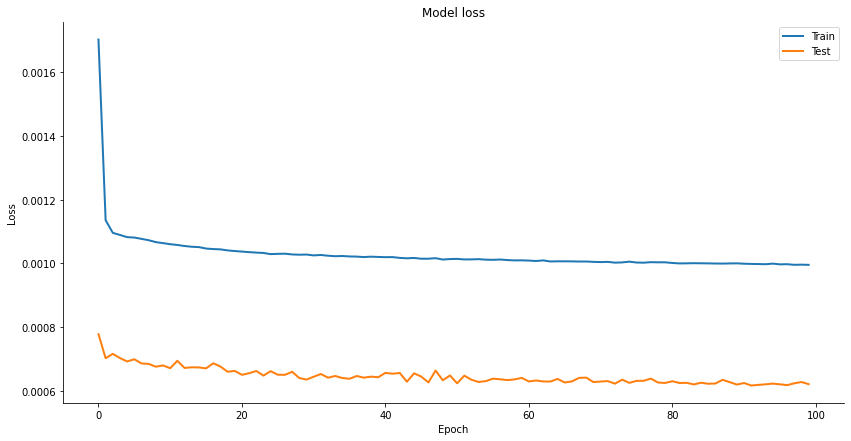

In [ ]:
# Plot history loss to observe the convergence 
plt.plot(history.history['loss'], linewidth=2, label='Train')
plt.plot(history.history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# Predicting for training data and calculating the error
prediction = autoencoder.predict(train_data2_sc)
error = tf.reduce_mean(tf.math.subtract(prediction,train_data2_sc),1)

In [ ]:
# Mean and standard deviation of Error
print(np.mean(error))
print(np.std(error))

-0.00036476427
0.0033773007


In [ ]:
# Defining the measures for outlier_lines to detect the thresholds
outlier_line1 = np.mean(error)+3*np.std(error)
outlier_line2 = np.mean(error)-3*np.std(error)

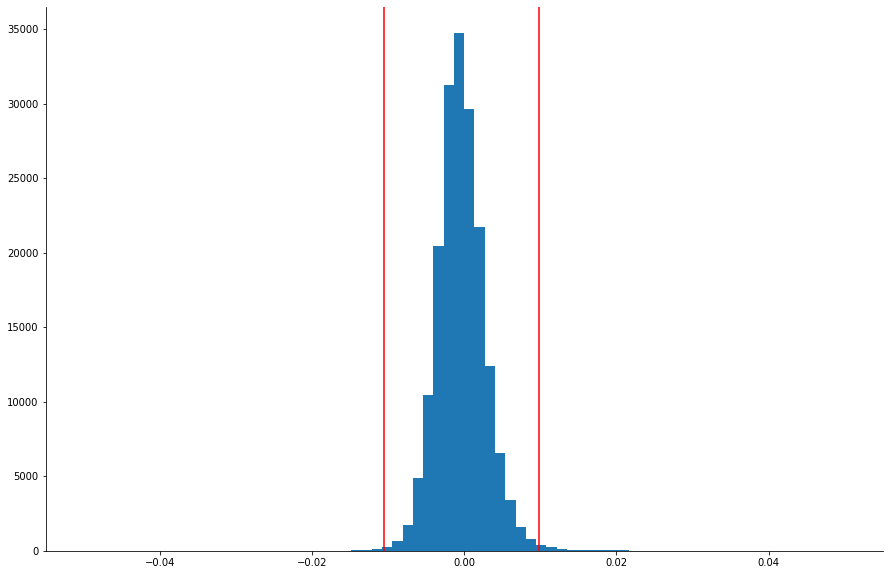

In [ ]:
# Plots for tranining MSE
fig = plt.figure(figsize=(15,10))
bins = np.linspace(-0.05,0.05,75)
plt.hist(error,bins=bins)
plt.axvline(outlier_line1,color='r')
plt.axvline(outlier_line2,color='r')

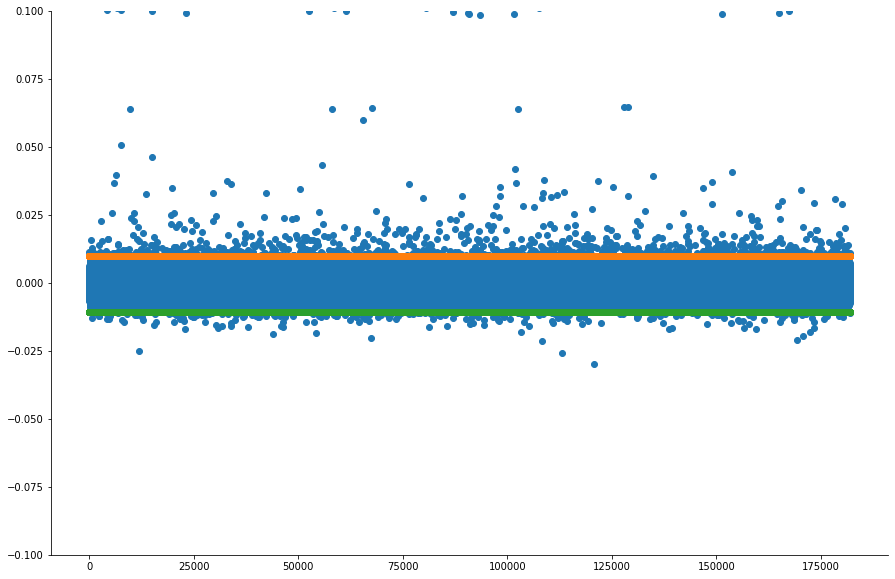

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.scatter(np.arange(len(error)),error)
plt.scatter(np.arange(len(error)),outlier_line1*np.ones((len(error))))
plt.scatter(np.arange(len(error)),outlier_line2*np.ones((len(error))))
plt.ylim([-0.1, 0.1])
plt.show()

In [ ]:
# Written to see the percentage of errors which are beyond the thresholds 
cnt = 0
for ii in range(len(error)):
  if error[ii]>outlier_line1 or error[ii]<outlier_line2:
    cnt = cnt + 1
print(cnt/len(error))   

In [ ]:
# Prediction with training and test data using the bottleneck as the model itself
bottleneck_res = bottlenecNet.predict(train_data2_sc)
bottleneck_res_anomaly = bottlenecNet.predict(anomaly_data_sc)


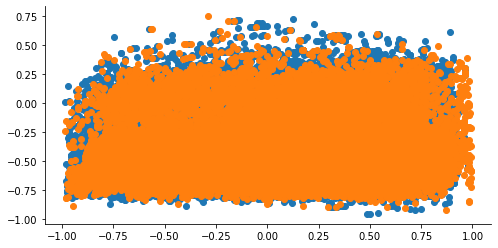

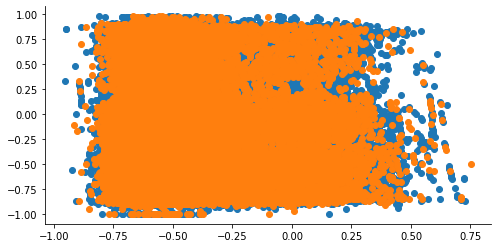

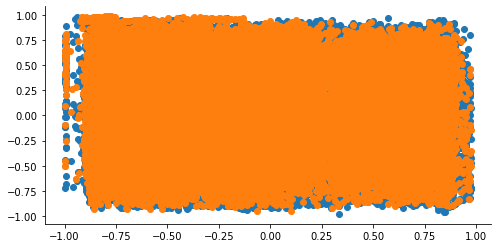

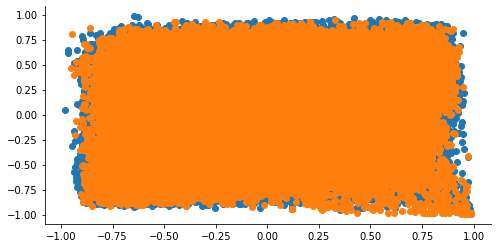

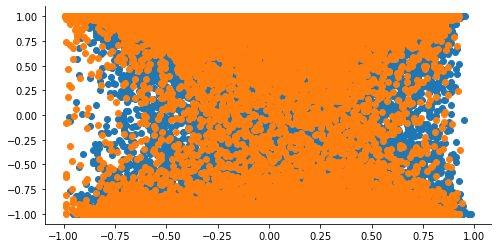

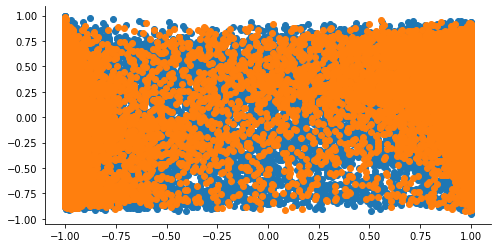

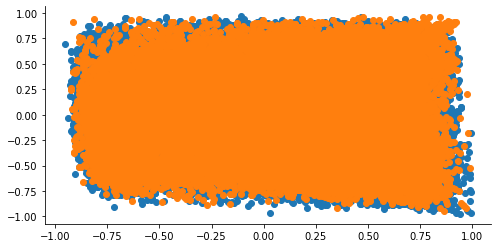

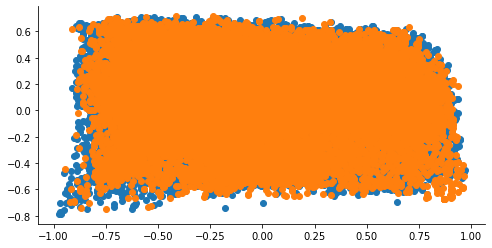

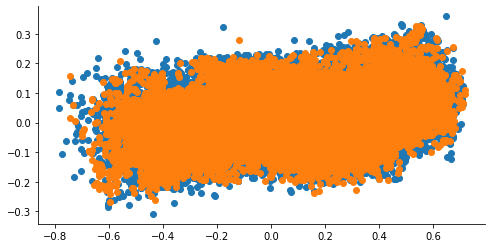

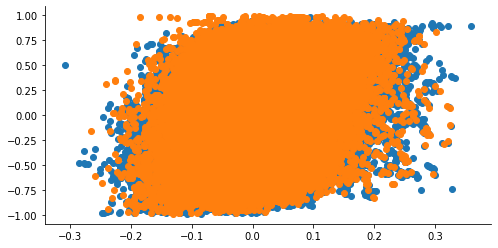

In [ ]:
# Plotting original and reconstructed data using bottleneck layer for all pair of dimensions
cntr = 1
for ii in range(latent_dim):
  if cntr == latent_dim:
    cntr = 0
  fig = plt.figure(figsize=(8,4))
  plt.scatter(bottleneck_res[:,ii],bottleneck_res[:,cntr])
  plt.scatter(bottleneck_res_anomaly[:,ii],bottleneck_res_anomaly[:,cntr])
  plt.show()
  cntr = cntr + 1

In [ ]:
# Prediction with training and test data using the autoencoder as model 
test_prediction = autoencoder.predict(anomaly_data_sc)
test_error = tf.reduce_mean(tf.math.subtract(test_prediction,anomaly_data_sc),1)

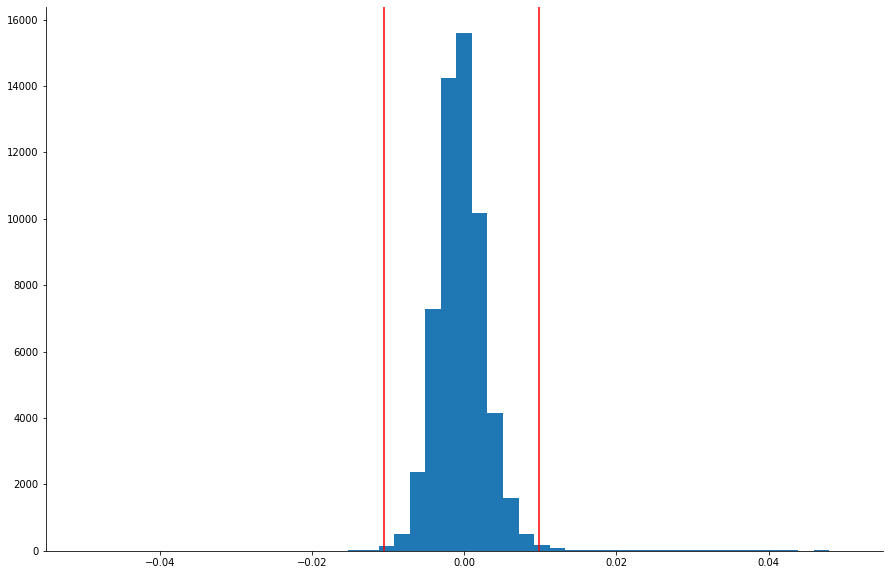

In [ ]:
# Plotting the histogram for test MSE
fig = plt.figure(figsize=(15,10))
bins = np.linspace(-0.05,0.05,50)
plt.hist(test_error,bins=bins)
plt.axvline(outlier_line1,color='r')
plt.axvline(outlier_line2,color='r')

In [ ]:
# Means and standard deviations of test errors
np.mean(test_error)
np.std(test_error)

0.00708902

In [ ]:
#Percentage1: Number of true negatives/(Number of true negatives + number of false negatives)
#Percentage2: The percentage of fraud data detected, CRITICAL! (Number of true negatives/Number of fraud data)

test_check = 0
count = 0
index = []
for k in range(len(test_error)):
  if test_error[k] > outlier_line1 or test_error[k] < outlier_line2:
    count += 1
    if anomaly_label[k] == 1:
      test_check += 1
    
percentage1 = (test_check/count)*100
percentage2  = (test_check/len(fraud_dataset))*100


print("percentage1", percentage1)
print("percentage2", percentage2)





percentage1 50.9020618556701
percentage2 80.28455284552845


In [ ]:
index = []
for k in range(len(test_error)):
  if test_error[k] > outlier_line1 or test_error[k] < outlier_line2:
    index.append(k)

In [ ]:
prediction_labels = np.zeros(len(anomaly_label))
for i in index:
  prediction_labels[i] = 1
np.unique(prediction_labels)

array([0., 1.])

In [ ]:
len(anomaly_data)

57355

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("Classification report for AutoEncoder: \n", classification_report(anomaly_label, prediction_labels, target_names=target_names))

Classification report for AutoEncoder: 
               precision    recall  f1-score   support

     class 0       1.00      0.99      1.00     56863
     class 1       0.51      0.80      0.62       492

    accuracy                           0.99     57355
   macro avg       0.75      0.90      0.81     57355
weighted avg       0.99      0.99      0.99     57355

